In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv(r"C:\Users\shiva\Documents\codes\INFOSYS-SPRINGBOARD\archive (4)\dataset - 2020-09-24.csv");
raw_data.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [3]:
raw_data.shape

(571, 59)

In [4]:
raw_data.info   # tells which columns are numerical, categorial, missing etc.

<bound method DataFrame.info of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward

In [5]:
# summary statistics for numerical columns
raw_data.describe

<bound method NDFrame.describe of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forwa

In [6]:
# checking for number of missing values in each column
raw_data.isnull().sum()

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

In [7]:
# exploring all the columns present in the dataset
raw_data.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [8]:
# we observe that there are role specific columns, for example -- goalkeeper stats are missing from all non-goal keepers (saves, penalties saved, punches, high claims etc)

#So first we will separate the role specific columns as per the roles

goal_keeper_cols = [
    'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches',
    'Sweeper clearances', 'Throw outs', 'Goal Kicks'
]

defender_cols = [
    'Tackles', 'Tackle success %', 'Last man tackles', 'Interceptions',
    'Clearances', 'Headed Clearance', 'Clearances off line',
    'Recoveries', 'Blocked shots', 'Aerial battles won', 'Aerial battles lost'
]

attacker_cols = [
    'Goals', 'Goals per match', 'Shots', 'Shots on target',
    'Big chances missed', 'Hit woodwork',
    'Headed goals', 'Goals with right foot', 'Goals with left foot',
    'Penalties scored', 'Freekicks scored', 'Shooting accuracy %'
]

midfielder_cols = [
    'Passes', 'Passes per match', 'Assists', 'Through balls',
    'Accurate long balls', 'Crosses', 'Cross accuracy %',
    'Big chances created'
]




In [9]:
# checking the unique values if positions which exist
raw_data['Position'].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [10]:
# now dropping the globally irrelevant columns
raw_data.drop(['Name', 'Jersey Number', 'Nationality'], axis=1, inplace=True)

In [11]:
# we will make a copy of the original dataset to proceed further
raw_data_copy = raw_data

In [12]:
# since all 0s cannot mean null values, some 0s may have statistical significance
# APPROACH -- if a goal-keeper has 0 for attacker columns, means they are nan values, but if an attacker has 0 for attacker columns that means 0s are significant. So we will handle role-wise

import numpy as np

# for a goal-keeper, the 0s in attacker, defender, midfielder columns mean nan values
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', attacker_cols + midfielder_cols + defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', attacker_cols + midfielder_cols + defender_cols].replace(0, np.nan)

# Defenders should not have attacker only stats
raw_data_copy.loc[raw_data['Position'] == 'Defender', attacker_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Defender', attacker_cols].replace(0, np.nan)

# Attackers/ Forwards should not have goal-keeper or defender only stats
raw_data_copy.loc[raw_data['Position'] == 'Forward', goal_keeper_cols + defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Forward', goal_keeper_cols + defender_cols].replace(0, np.nan)

# Midfielders should not have goal keeper or pure defender stats
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', goal_keeper_cols + defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', goal_keeper_cols + defender_cols].replace(0, np.nan)





In [13]:
# Now the next step if to fill the nan values with means role-wise

# For goal-keeper columns
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', goal_keeper_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Goalkeeper', goal_keeper_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

# For defender columns
raw_data_copy.loc[raw_data['Position'] == 'Defender', defender_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Defender', defender_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

# For Mid-fielder columns
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', midfielder_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Midfielder', midfielder_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

# For Attacker/ Forward columns
raw_data_copy.loc[raw_data['Position'] == 'Forward', attacker_cols] = \
raw_data_copy.loc[raw_data['Position'] == 'Forward', attacker_cols].fillna(
    raw_data.groupby('Position')[goal_keeper_cols].transform('mean')
)

In [14]:
# here we can observe that all the non-goal-keeper stats are nan for a goal-keeper, all the goal-keeper stats are nan for other roles, means those columns are irrelevant for that role
raw_data_copy.head()

,Club,Position,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Arsenal,Goalkeeper,28.0,64,28,16,NaN,NaN,NaN,NaN,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Arsenal,Goalkeeper,26.0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Arsenal,Goalkeeper,25.0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Arsenal,Defender,25.0,160,90,37,7.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Arsenal,Defender,23.0,16,7,5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [15]:
raw_data_copy.tail()

,Club,Position,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Wolverhampton-Wanderers,Forward,20.0,31,14,7,3.0,0.10,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Wolverhampton-Wanderers,Forward,29.0,78,32,23,32.0,0.41,9.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Wolverhampton-Wanderers,Forward,24.0,105,27,47,5.0,0.05,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Wolverhampton-Wanderers,Forward,18.0,1,0,1,0.0,1.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Wolverhampton-Wanderers,Forward,20.0,0,0,0,0.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


## Exploratory data analysis - (plotting the graphs and plots)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


### Histogram - goals vs. frequency

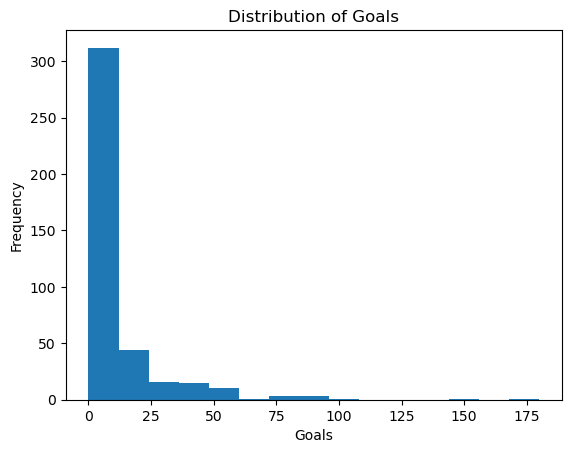

In [18]:
plt.figure()
plt.hist(raw_data_copy['Goals'], bins=15)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals')
plt.show()


### Scatter — Appearances vs Goals

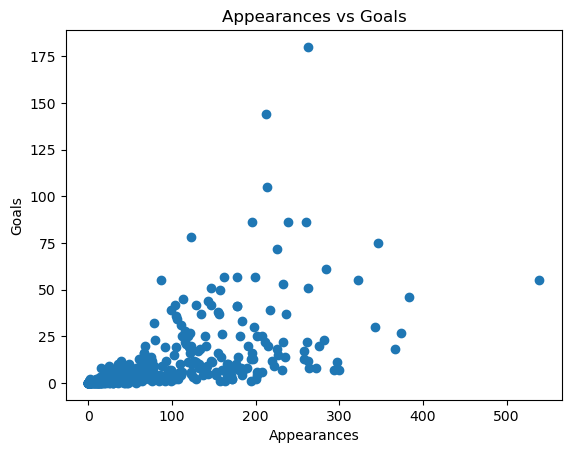

In [19]:
plt.figure()
plt.scatter(raw_data_copy['Appearances'], raw_data_copy['Goals'])
plt.xlabel('Appearances')
plt.ylabel('Goals')
plt.title('Appearances vs Goals')
plt.show()


### Scatter — Age vs Goals

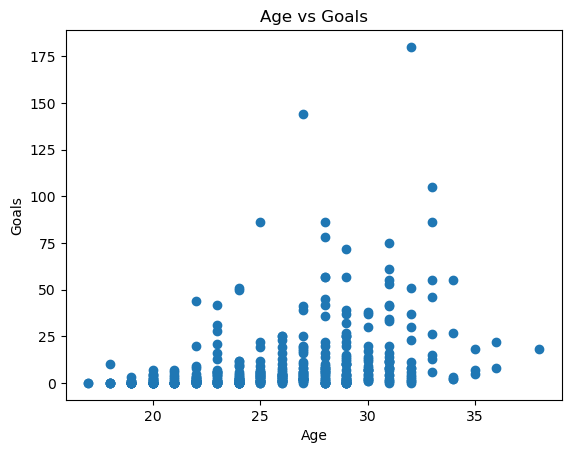

In [20]:
plt.figure()
plt.scatter(raw_data_copy['Age'], raw_data_copy['Goals'])
plt.xlabel('Age')
plt.ylabel('Goals')
plt.title('Age vs Goals')
plt.show()


### Bar Chart — Club vs Goals (Sum)

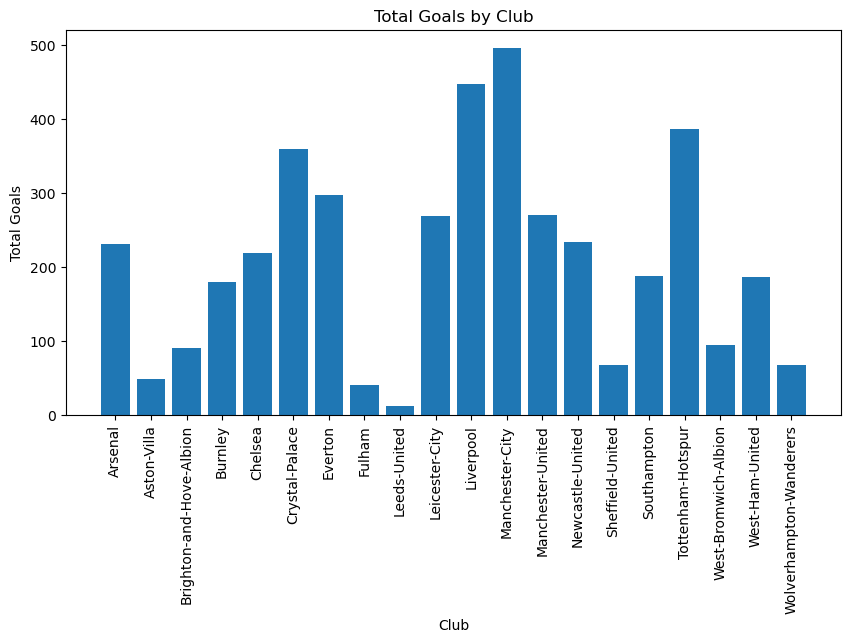

In [21]:
club_goals = raw_data_copy.groupby('Club')['Goals'].sum()

plt.figure(figsize=(10,5))
plt.bar(club_goals.index, club_goals.values)
plt.xlabel('Club')
plt.ylabel('Total Goals')
plt.title('Total Goals by Club')
plt.xticks(rotation=90)
plt.show()


### Bar Chart — Position vs Goals (Average)

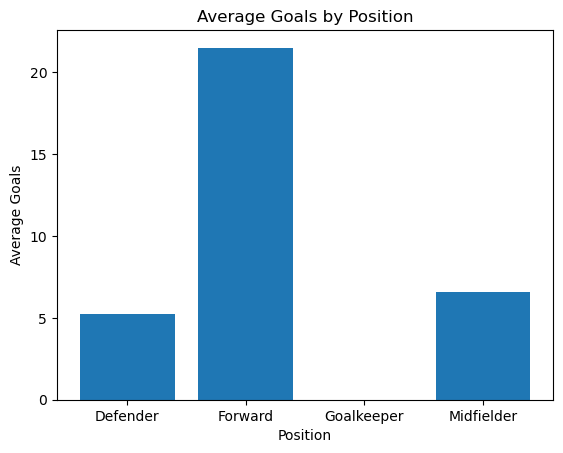

In [22]:
position_avg_goals = raw_data_copy.groupby('Position')['Goals'].mean()

plt.figure()
plt.bar(position_avg_goals.index, position_avg_goals.values)
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.title('Average Goals by Position')
plt.show()


### Scatter — Shots vs Goals

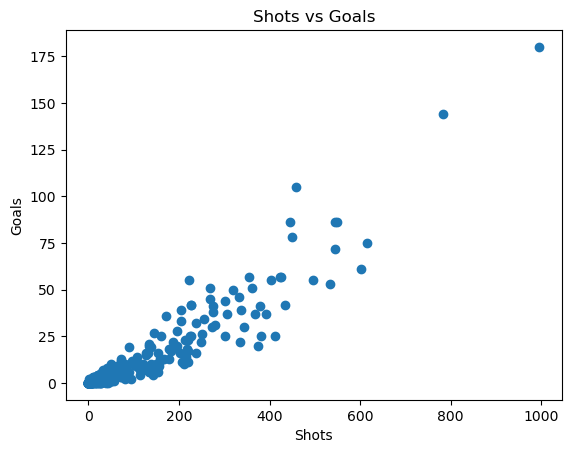

In [23]:
plt.figure()
plt.scatter(raw_data_copy['Shots'], raw_data_copy['Goals'])
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Shots vs Goals')
plt.show()


### Scatter — Assists vs Goals

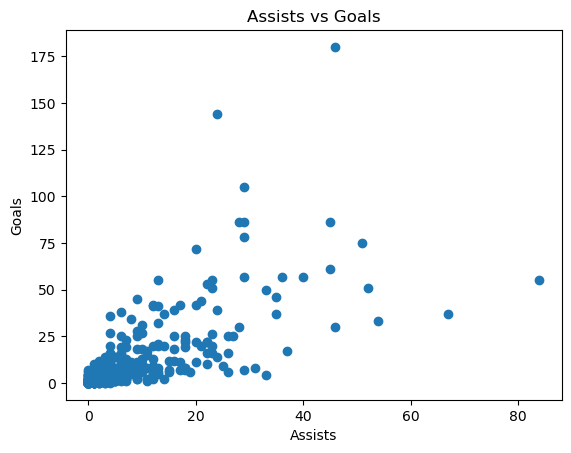

In [24]:
plt.figure()
plt.scatter(raw_data_copy['Assists'], raw_data_copy['Goals'])
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.title('Assists vs Goals')
plt.show()


### Scatter — Passes vs Assists

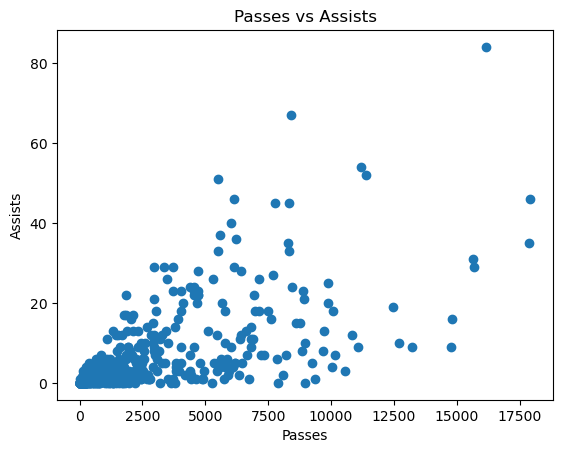

In [25]:
plt.figure()
plt.scatter(raw_data_copy['Passes'], raw_data_copy['Assists'])
plt.xlabel('Passes')
plt.ylabel('Assists')
plt.title('Passes vs Assists')
plt.show()


In [28]:
raw_data_copy['Tackle success %'].dtype


dtype('O')

In [29]:
# converting the string values into numerical values, as matplotlib cannot plot string values

raw_data_copy['Tackle success %'] = (
    raw_data_copy['Tackle success %']
    .astype(str)
    .str.replace('%', '', regex=False)
)

raw_data_copy['Tackle success %'] = pd.to_numeric(
    raw_data_copy['Tackle success %'],
    errors='coerce'
)


### Scatter — Tackles vs Tackle Success %

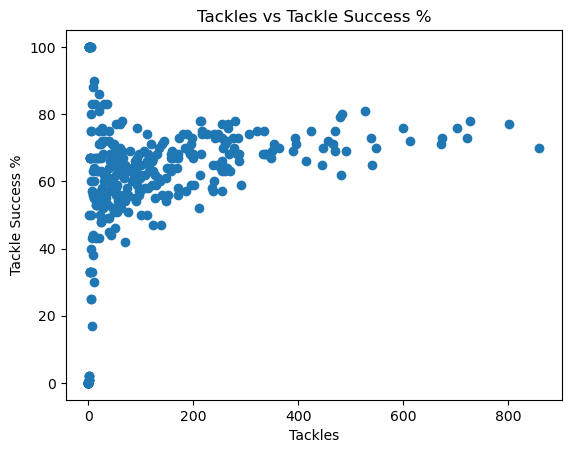

In [30]:
plt.figure()
plt.scatter(raw_data_copy['Tackles'], raw_data_copy['Tackle success %'])
plt.xlabel('Tackles')
plt.ylabel('Tackle Success %')
plt.title('Tackles vs Tackle Success %')
plt.show()
